# Setup

## Imports

All the keras modules

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, TimeDistributed, BatchNormalization, Dropout
from keras.initializers import identity
from keras.initializers import Constant
from keras.backend import clear_session
from keras_tqdm import TQDMNotebookCallback

In [5]:
from vaiutils import path_consts
from vainlp import extract_glove_embeddings

## Load data and create useful variables

In [6]:
for k,v in path_consts(['SampleText', 'GloVe'], 'TextGen'):
    exec(k+'=v')

In [18]:
with open(DIR_DATA['SampleText'] + '/styles.txt') as f:
    data = f.read()

In [19]:
with open(DIR_DATA['GloVe'] + '/glove.6B.50d.txt') as f:
    glove = f.readlines()

In [20]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t')
glove_embeddings = extract_glove_embeddings([data], glove, tokenizer)
data = np.array(tokenizer.texts_to_sequences([data])[0])

100%|██████████| 5051/5051 [02:58<00:00, 28.34it/s]


In [21]:
word_idx = tokenizer.word_index
idx_word = {i: w for w, i in word_idx.items()}

In [22]:
vocab_size = len(word_idx)

# Create and Train Model

Create Model

In [31]:
batch_size = 64
in_len = 40
clear_session()
model = Sequential([
    Embedding(vocab_size, 128, input_length=in_len, batch_input_shape=(batch_size, in_len), embeddings_initializer=Constant(glove_embeddings)),
    BatchNormalization(),
    LSTM(256, stateful=True, return_sequences=True),
    BatchNormalization(),
    LSTM(256, stateful=True, return_sequences=True),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])
model.layers[0].trainable = False
model.compile('adam', loss='sparse_categorical_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (64, 40, 128)             646528    
_________________________________________________________________
batch_normalization_1 (Batch (64, 40, 128)             512       
_________________________________________________________________
lstm_1 (LSTM)                (64, 40, 256)             394240    
_________________________________________________________________
batch_normalization_2 (Batch (64, 40, 256)             1024      
_________________________________________________________________
lstm_2 (LSTM)                (64, 40, 256)             525312    
_________________________________________________________________
time_distributed_1 (TimeDist (64, 40, 5051)            1298107   
Total params: 2,865,723
Trainable params: 2,218,427
Non-trainable params: 647,296
____________________________________________________________

Reshape data into correct dimensions

In [32]:
def create_data(data):
    last_idx = int(len(data)/in_len)*in_len
    x = data[:last_idx].reshape((-1, in_len))
    y = data[1:last_idx+1].reshape((-1, in_len))

    last_idx = int(len(x)/batch_size)*batch_size
    x = x[:last_idx]
    y = y[:last_idx]
    return x, np.expand_dims(y, 2)

train_idx = int(0.8 * len(data))
x, y = create_data(data[:train_idx])
x_val, y_val = create_data(data[train_idx:])

Helper Function for training

In [33]:
def fit_model(epochs=1, lr=1e-3):
    model.optimizer.lr = lr
    return model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=0, callbacks=[TQDMNotebookCallback()], shuffle=False, validation_data=(x_val, y_val))

Fit the model

In [34]:
hist = fit_model(100)

HBox(children=(IntProgress(value=0, description='Training'), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 20', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 21', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 22', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 23', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 24', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 25', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 26', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 27', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 28', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 29', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 30', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 31', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 32', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 33', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 34', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 35', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 36', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 37', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 38', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 39', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 40', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 41', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 42', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 43', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 44', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 45', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 46', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 47', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 48', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 49', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 50', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 51', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 52', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 53', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 54', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 55', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 56', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 57', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 58', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 59', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 60', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 61', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 62', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 63', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 64', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 65', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 66', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 67', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 68', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 69', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 70', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 71', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 72', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 73', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 74', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 75', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 76', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 77', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 78', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 79', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 80', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 81', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 82', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 83', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 84', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 85', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 86', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 87', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 88', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 89', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 90', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 91', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 92', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 93', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 94', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 95', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 96', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 97', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 98', max=1024), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 99', max=1024), HTML(value='')))

Visualization of the loss after each epoch

(0.050328277051448822, 9.9990599155426025)

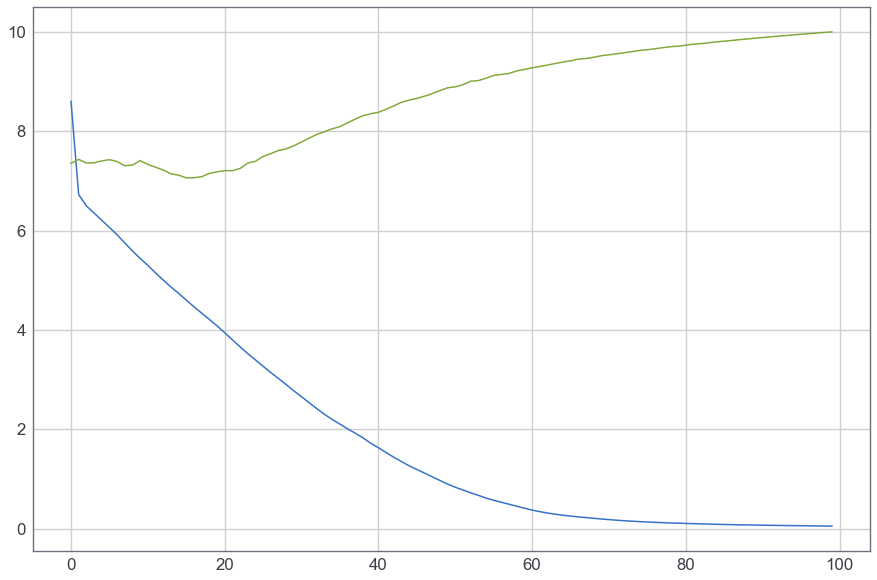

In [12]:
plot(hist.history['loss'])
plot(hist.history['val_loss'])
hist.history['loss'][-1], hist.history['val_loss'][-1]

# Test Model

Helper method to form sentence from word IDs

In [13]:
def sentence(x):
    if type(x) == np.int64:
        return idx_word[x]
    else:
        return ' '.join(idx_word[i] for i in x)

Helper method to predict on single batch for stateful networks

In [14]:
def predict_single_batch(x, max=True):
    x = np.tile(x, batch_size).reshape((batch_size, in_len))
    if max:
        return model.predict(x, batch_size=batch_size)[0, in_len-1].argmax()
    else:
        return np.random.choice(range(vocab_size), p=model.predict(x, batch_size=batch_size)[0,in_len-1])

Something that can produce text of arbitrary length given an initial seed

In [15]:
def produce_text(seed_text, length):
    seed_idx = np.array(tokenizer.texts_to_sequences([seed_text])[0])
    
    gen_idx = seed_idx[:in_len]
    for i in range(length):
        generated_id = predict_single_batch(gen_idx[-in_len:], False)
        gen_idx = np.append(gen_idx, generated_id)
        gen_idx = np.append(gen_idx, seed_idx[in_len+i:in_len+i+1])
        
    print(sentence(gen_idx))

Let's test it out!

In [16]:
test_data = open(DIR_DATA + '/styles.txt').read()
test_data = np.array(tokenizer.texts_to_sequences([test_data])[0])

In [17]:
model.save_weights(DIR_DATA+'/lstm.h5')

In [18]:
seed_pos = randint(0, len(test_data)-in_len+128)
seed_text = sentence(test_data[seed_pos:seed_pos+in_len+128])
produce_text(seed_text, 128)

shade do not
forget that my friend it is the key to the whole riddle 

 and the second point i asked 

 the important fact that monsieur inglethorp wears very peculiar
clothes has a black beard and uses glasses 

 poirot i i 'm cannot must believe there you will are convinced serious mrs 

 yes i said am in absolutely indignantly serious 

 my friend friend i 

 do but it's this it is said childish a 

 well no one it is is 

 very well momentous 

 

 ah and my supposing the the coroner coroner's little jury 
what returns a a man verdict 

 of recite wilful strength murder
against lawrence alfred inglethorp inglethorp dusted what referred becomes of of scattered your opinion theories there then 

 

 good they married would be not further be a shaken oh because murmured twelve nor stupid of men went had down happened to to follow make
a annie mistake whether but it that wasn't will 
he not locked occur luckily for mr one 17th thing 

 a will country ' jury yes is lawrence's
reply not
